In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

# Price coarseness test data


In [3]:
df = pd.read_csv('prizes_electricity_365_days_per_15_minutes.csv')


In [4]:
#create course data

df_hour_coarse = df.groupby(np.arange(len(df))//4).mean()
df_day_coarse = df.groupby(np.arange(len(df))//96).mean()
df['Hour_coarse_Eprice'] = np.repeat(df_hour_coarse['Electricity_price'],4).reset_index(drop=True)
df['Day_coarse_Eprice'] = np.repeat(df_day_coarse['Electricity_price'],96).reset_index(drop=True)

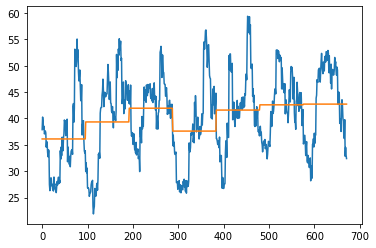

In [5]:
plt.plot(df['Electricity_price'][0:96*7])
plt.plot(df['Day_coarse_Eprice'][0:96*7])

In [68]:
#load run data with normal and course inputs
dfcoarse_run = pd.read_csv('Coarse_price_scen2_rep1_evs1_price1.csv')
dfnormal_run = pd.read_csv('SensitivityV2_scen2_rep1_evs1_price1.csv')

In [48]:
def comparison(dforiginal,dfcompare,Start,Stop,label_name,compare_name):
    '''
    compares of various EVM KPI's when ran with original data or with
    disaggregated data
    
    Input:
    dforiginal: dataframe containing run results using original inputs
    dforiginal: dataframe containing run results using disaggregated inputs
    start: integer, plot window start
    stop: integer, plot window end
    label_name: string, name to label data in graph
    compare_name: string, name to state disaggregation method used in comparison
    
    Output:
    none
    '''
    plt.figure(figsize=(15,5))
    start = Start
    stop = Stop
    x = np.linspace(0,stop-start,stop-start)
    plt.plot(x,dfcompare['total_current_power_demand'][start:stop],label='Power demand, {} price'.format(label_name),alpha=0.9)
    plt.plot(x,dforiginal['total_current_power_demand'][start:stop],label='Power demand, original price',alpha=0.75,linestyle=':')
    plt.plot(x,dfcompare['total_VTG_capacity'][start:stop],label='VTG capacity, {} price'.format(label_name),alpha=0.9)
    plt.plot(x,dforiginal['total_VTG_capacity'][start:stop],label='VTG capacity, original price',alpha=0.75,linestyle=':')
    plt.title("EVM KPI's behaviour comparison: {}".format(compare_name))
    plt.ylabel('Electricity (KW)')
    plt.xlabel('Time (15 min)')
    plt.legend()
    plt.show()


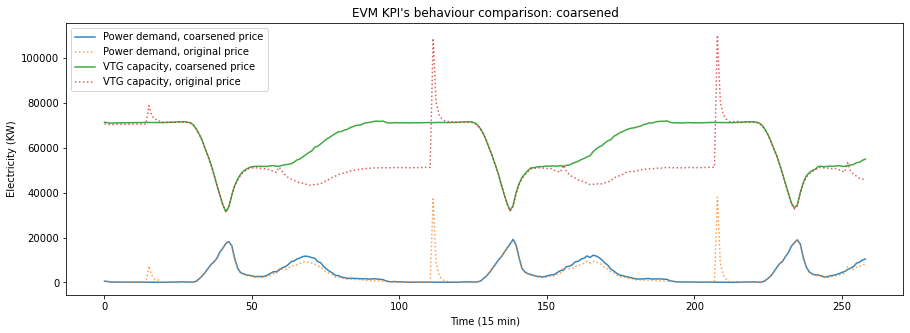

In [69]:
comparison(dfnormal_run,dfcoarse_run,192,450,'coarsened','coarsened')

# EV space distribution test data

In [6]:
df2 = pd.read_csv('gemeenten.csv',usecols = ['GM_CODE','AANT_INW']).set_index('GM_CODE')

In [7]:
df2

AANT_INW
GM_CODE          
GM0014     233273
GM0034     214715
GM0037      31754
GM0047      27417
GM0050      22879
...           ...
GM1966      47834
GM1969      63678
GM1970      45481
GM1978      44130
GM1979      45587

[352 rows x 1 columns]

In [8]:
gem_inw = round(statistics.mean(df2['AANT_INW']))

In [9]:
df2['EV_spatial_distribution_mean'] = gem_inw

In [10]:
df2

AANT_INW  EV_spatial_distribution_mean
GM_CODE                                        
GM0014     233273                         49646
GM0034     214715                         49646
GM0037      31754                         49646
GM0047      27417                         49646
GM0050      22879                         49646
...           ...                           ...
GM1966      47834                         49646
GM1969      63678                         49646
GM1970      45481                         49646
GM1978      44130                         49646
GM1979      45587                         49646

[352 rows x 2 columns]

In [11]:
#df2.to_csv('EV_spatial_disagg_mean.csv')